# EDA Project

## Let's analyze the KC_housing_data :

In [99]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [100]:
# Reading the dataset
df = pd.read_csv('KC_housing_data.csv')
# df.head()

**Hypothesis 1:** Homes with higher view ratings have significantly higher median prices compared to homes without notable views. (Price +View)

In [101]:
# Cleaning the dataset according to the Hypo:
# df.columns // it displays the columns list exist in the dataset...
df_h1 = df.dropna(subset=['price', 'view', 'sqft_living', 'condition'])
# df_h1.tail()

In [102]:
# Grouping the variables for better analysis:
df_h1 = df.dropna(subset=['price', 'view', 'sqft_living', 'condition']).copy()
# Got the syntax form documentation and help of AI, It defines the view into 3 categories:
# 1. 0_no, 
# 2. 1_2_low, 
# 3. 3_4_high
df_h1['view_level'] = pd.cut(
    df_h1['view'],
    bins=[-0.5, 0.5, 2.5, 4.5],   # 0 | 1–2 | 3–4
    labels=['0_no', '1_2_low', '3_4_high']
)

In [103]:
# Calculating the median
if 'view_level' in df_h1.columns:
    median_by_view_level = df_h1.groupby('view_level')['price'].median()
    print(median_by_view_level)

view_level
0_no        440912.5
1_2_low     669375.0
3_4_high    972500.0
Name: price, dtype: float64


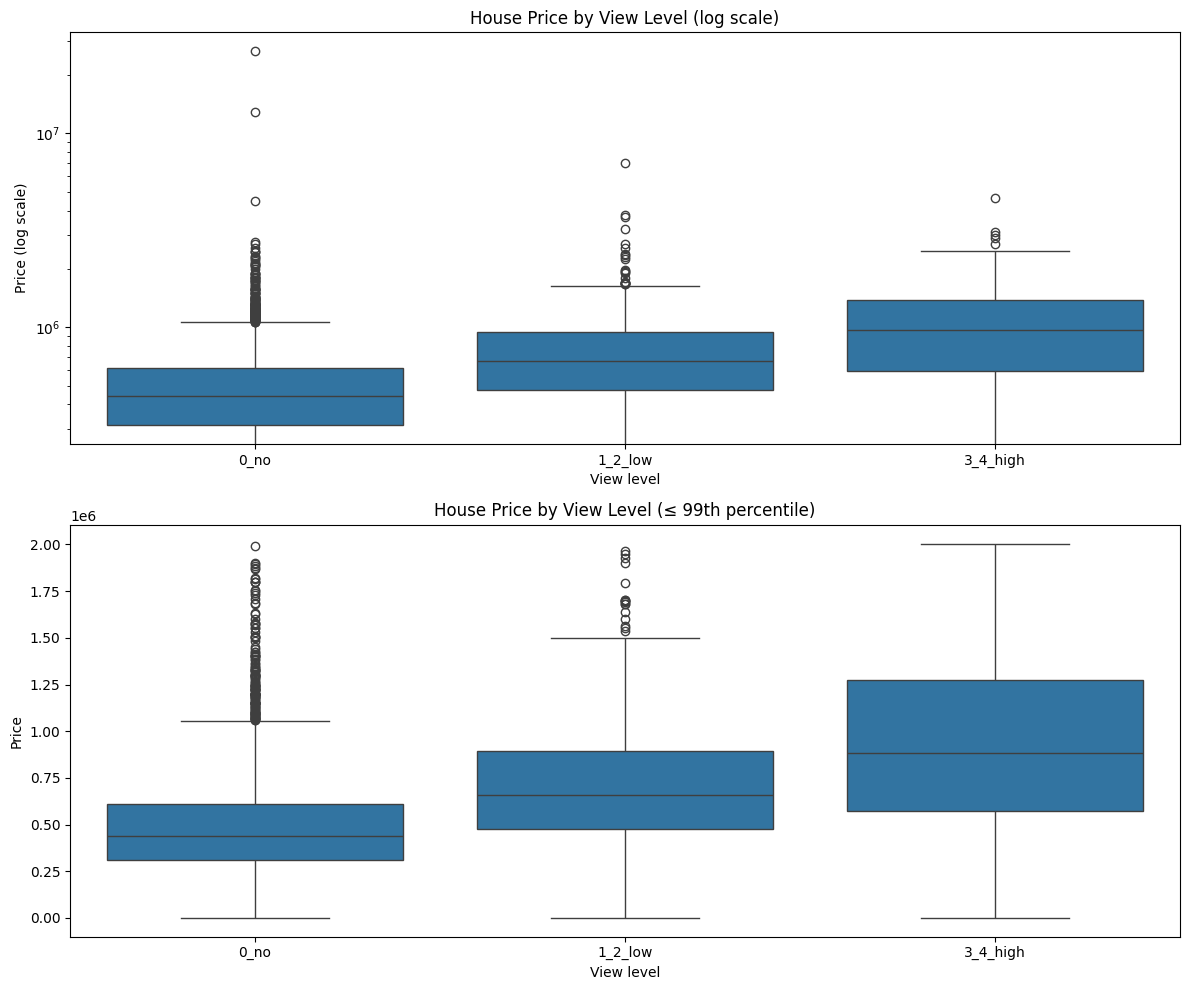

In [104]:
# Visualization: 
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# 1) Log-scale boxplot on full data
sns.boxplot(data=df_h1, x='view_level', y='price', ax=ax[0])
ax[0].set_yscale('log')
ax[0].set_title('House Price by View Level (log scale)')
ax[0].set_xlabel('View level')
ax[0].set_ylabel('Price (log scale)')

# 2) Boxplot trimmed at 99th percentile
p99 = df_h1['price'].quantile(0.99)
df_h1_trim = df_h1[df_h1['price'] <= p99]

sns.boxplot(data=df_h1_trim, x='view_level', y='price', ax=ax[1])
ax[1].set_title('House Price by View Level (≤ 99th percentile)')
ax[1].set_xlabel('View level')
ax[1].set_ylabel('Price')

plt.tight_layout()
plt.show()



According to the graphs above, we can observe that-<br>
**Observation:** Median prices increase from 0_no → 1_2_low → 3_4_high <br> 
**Graph1:** Log‑scale plot confirms the pattern on the full data
**Graph 2:** It tells us the price uplift is not only due to a handful of luxury properties; the typical high‑view home sits in a higher price band than the typical no‑view home.<br>
**Conclusion:** Analysis of the KingCounty‑housing data shows a positive relationship between view level and house price.
### Hypothesis 1 holds True.

**Hypothesis 2:** Properties with high view scores are geographically clustered in specific premium locations (e.g., waterfront or elevated urban areas).

In [105]:
# df.columns
df_h2 = df.dropna(subset=['view', 'waterfront', 'city', 'statezip']).copy()
# It defines the view into 3 categories:
# 1. 0_no, 
# 2. 1_2_low, 
# 3. 3_4_high
df_h2['view_level'] = pd.cut(
    df_h2['view'],
    bins=[-0.5, 0.5, 2.5, 4.5],          # 0 | 1–2 | 3–4
    labels=['0_no', '1_2_low', '3_4_high']
)
df_h2['high_view'] = df_h2['view'] >= 3 #simple flag: high view yes/no
# df_h2.tail()

In [106]:
# Comparing high value property with waterfront, to verify weather waterfront view is high valued or not in most cases.
ct_view_waterfront = pd.crosstab(df_h2['high_view'], df_h2['waterfront'], normalize='index') # normalize='index-->row percentages
# Note: .crosstab(), it summarise the relationship between teo categories or variables. Here [high_view with waterfront]
print(ct_view_waterfront) # 0 means 'no' and 1 means 'yes'

waterfront         0         1
high_view                     
False       0.998867  0.001133
True        0.849462  0.150538


Here, we can observe that, for non-high_view 0.001133 percent is waterfront.<br> 
On the other hand, for high_view 0.150538 percent is waterfront.<br>
**Insight:** high‑view homes are much more likely to be on the waterfront than other homes **(about 15% vs 0.1%).** This clearly supports “high views cluster in premium waterfront locations”.

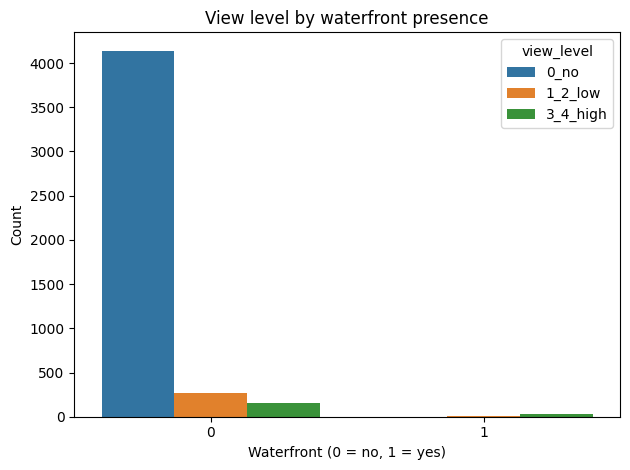

In [107]:
# Visual representation of hypo 2 with countplot
sns.countplot(data=df_h2, x='waterfront', hue='view_level')
plt.title('View level by waterfront presence')
plt.xlabel('Waterfront (0 = no, 1 = yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [108]:
# share of high-view homes by city
share_high_view_city = (
    df_h2.groupby('city')['high_view']
         .mean()
         .sort_values(ascending=False)
)
print(share_high_view_city.head(10))

# or by statezip
share_high_view_statezip = (
    df_h2.groupby('statezip')['high_view']
         .mean()
         .sort_values(ascending=False)
)
print(share_high_view_statezip.head(10))

city
Vashon           0.275862
Mercer Island    0.162791
Des Moines       0.120690
Normandy Park    0.111111
Enumclaw         0.107143
Burien           0.094595
Medina           0.090909
Clyde Hill       0.090909
Fall City        0.090909
Bellevue         0.073427
Name: high_view, dtype: float64
statezip
WA 98070    0.275862
WA 98177    0.207547
WA 98040    0.162791
WA 98119    0.142857
WA 98057    0.142857
WA 98006    0.136364
WA 98166    0.135593
WA 98198    0.125000
WA 98144    0.125000
WA 98116    0.123077
Name: high_view, dtype: float64


**Observation** from countplot and groupby method- <br>
Cities such as Vashon (~28% high‑view), Mercer Island (~16%), and Des Moines (~12%) have notably higher shares of high‑view homes than the county average, indicating geographic clustering of view properties in specific cities.

### Conclusion:
High‑view properties are geographically clustered in premium locations: roughly 15% of high‑view homes are waterfront versus only about 0.1% of non‑high‑view homes, and cities/zip codes such as Vashon (WA 98070, ~28% high‑view) and Mercer Island (WA 98040, ~16% high‑view) have disproportionately high shares of high‑view houses compared with the rest of King County.
### Hypothesis 2 holds True.

### Another Visual representation of the hypothesis using heatmap

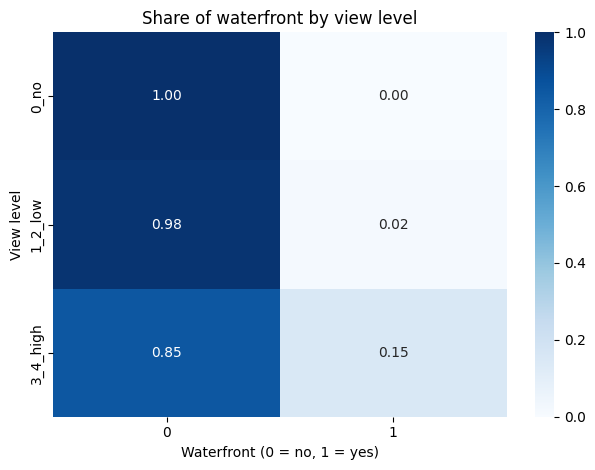

In [109]:
ct = pd.crosstab(df_h2['view_level'], df_h2['waterfront'], normalize='index')

sns.heatmap(ct, annot=True, fmt=".2f", cmap="Blues")
plt.title('Share of waterfront by view level')
plt.xlabel('Waterfront (0 = no, 1 = yes)')
plt.ylabel('View level')
plt.tight_layout()
plt.show()


## Sections below this, is some other work, which was done during the analysis.
# Thanks for visiting

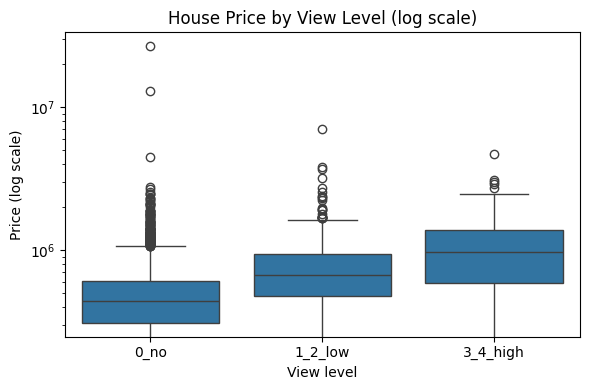

In [110]:
# Individual ifg 1:
# Boxplot of price by view_level 
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_h1, x='view_level', y='price')
plt.yscale('log')
plt.title('House Price by View Level (log scale)')
plt.xlabel('View level')
plt.ylabel('Price (log scale)')
plt.tight_layout()
plt.show()

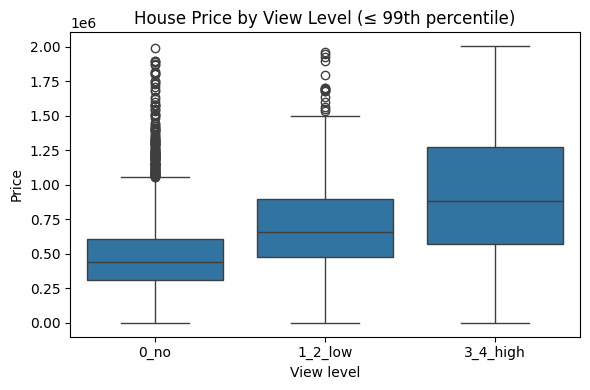

In [111]:
# Individual ifg 2:
# Boxplot with 99 percentile means limiting the y axis, it has a high price range in that axis
p99 = df_h1['price'].quantile(0.99)
df_h1_trim = df_h1[df_h1['price'] <= p99]
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_h1_trim[df_h1_trim['price'] <= p99], x='view_level', y='price')
plt.title('House Price by View Level (≤ 99th percentile)')
plt.xlabel('View level')
plt.ylabel('Price')
plt.tight_layout()
plt.show()
